In [1]:
import os
from importlib import reload

import pandas as pd

In [2]:
from analysis.timescales import compute_taus_growing
reload(compute_taus_growing)

<module 'analysis.timescales.compute_taus_growing' from '/raven/u/mhami/rnn_timescale_public/analysis/timescales/compute_taus_growing.py'>

In [3]:
slurm_path = os.path.abspath("./trained_models/SLURM_ARRAY_JOB_ID=7681088_Mar-11-2024-16_09_54")
paths = compute_taus_growing.resolve_paths(slurm_path)


100%|██████████| 1024/1024 [00:00<00:00, 2550.51it/s]


In [4]:
list(paths.keys())[:5]

['323_grow_parity_',
 '1421_grow_parity_',
 '800_grow_parity_',
 '1801_grow_parity_',
 '1734_grow_parity_']

In [5]:
len(paths)

1024

In [6]:
print(paths['643_grow_parity_'])

['rnn_1_N5', 'rnn_1_N2', 'configs.json', 'rnn_1_N16', 'stats.npy', 'rnn_1_N6', 'rnn_1_N3', 'rnn_1_N15', 'rnn_1_N17', 'rnn_1_N8', 'rnn_0_init', 'rnn_1_N11', 'rnn_1_N12', 'rnn_1_N18', 'rnn_1_N19', 'rnn_1_N7', 'rnn_1_N4', 'rnn_1_N9', 'rnn_1_N14', 'rnn_1_N13', 'rnn_1_N10']


In [7]:
configs, stats, missing = compute_taus_growing.get_all_configs_and_stats(slurm_directory=slurm_path)

100%|██████████| 1024/1024 [00:02<00:00, 367.39it/s]


In [8]:
len(stats)

1024

In [9]:
# print(stats[10]['accuracy'])

In [10]:
for stat in stats:
    stat['len_accuracies'] = list(map(lambda x: len(x), stat['accuracy']))

In [11]:
configs_df = pd.DataFrame(configs)
stats_df = pd.DataFrame(stats)

In [12]:
stats_df

,loss,accuracy,time,epochs,max_N,subdir,len_accuracies
0,"[0.2715088289482519, 0.1579944550059736, 0.205...","[[100.0], [100.0, 100.0], [100.0, 100.0, 100.0...","[10.96755862236023, 31.179903745651245, 83.260...",17,"[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...",323_grow_parity_,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
1,"[0.12202395050693303, 0.10112663013115525, 0.2...","[[100.0], [100.0, 100.0], [100.0, 100.0, 100.0...","[4.812973260879517, 16.095382928848267, 36.088...",28,"[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...",1421_grow_parity_,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 11, 12..."
2,"[0.16078113134671002, 0.1625029559340328, 0.23...","[[100.0], [100.0, 100.0], [100.0, 100.0, 98.76...","[8.779330730438232, 24.256601810455322, 54.752...",19,"[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...",800_grow_parity_,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
3,"[0.16078113134671002, 0.1625029559340328, 0.26...","[[100.0], [100.0, 100.0], [100.0, 100.0, 96.22...","[11.09047245979309, 33.77867889404297, 72.6794...",23,"[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...",1801_grow_parity_,"[1, 2, 3, 3, 4, 5, 6, 7, 8, 8, 9, 10, 11, 12, ..."
4,"[0.17045902049145661, 0.13771812912099995, 0.1...","[[100.0], [100.0, 100.0], [100.0, 100.0, 100.0...","[15.600406885147095, 41.17249369621277, 105.85...",16,"[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...",1734_grow_parity_,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
...,...,...,...,...,...,...,...
1019,"[0.12202395050693303, 0.10112663013115525, 0.3...","[[100.0], [100.0, 100.0], [100.0, 100.0, 99.38...","[5.102444171905518, 16.61868190765381, 34.8854...",25,"[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...",418_grow_parity_,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
1020,"[0.16078113134671002, 0.1625029559340328, 0.23...","[[100.0], [100.0, 100.0], [100.0, 100.0, 98.76...","[9.590940237045288, 29.602954864501953, 62.155...",20,"[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...",1806_grow_parity_,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
1021,"[0.2715088289482519, 0.1579944550059736, 0.205...","[[100.0], [100.0, 100.0], [100.0, 100.0, 100.0...","[7.434954881668091, 20.271660566329956, 44.028...",25,"[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...",1903_grow_parity_,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
1022,"[0.17045902049145661, 0.13771812912099995, 0.1...","[[100.0], [100.0, 100.0], [100.0, 100.0, 100.0...","[6.246819734573364, 21.712166786193848, 49.938...",23,"[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...",1262_grow_parity_,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."


In [13]:
configs_df['subdir']

0        323_grow_parity_
1       1421_grow_parity_
2        800_grow_parity_
3       1801_grow_parity_
4       1734_grow_parity_
              ...        
1019     418_grow_parity_
1020    1806_grow_parity_
1021    1903_grow_parity_
1022    1262_grow_parity_
1023    1070_grow_parity_
Name: subdir, Length: 1024, dtype: object

In [14]:
stats_df

,loss,accuracy,time,epochs,max_N,subdir,len_accuracies
0,"[0.2715088289482519, 0.1579944550059736, 0.205...","[[100.0], [100.0, 100.0], [100.0, 100.0, 100.0...","[10.96755862236023, 31.179903745651245, 83.260...",17,"[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...",323_grow_parity_,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
1,"[0.12202395050693303, 0.10112663013115525, 0.2...","[[100.0], [100.0, 100.0], [100.0, 100.0, 100.0...","[4.812973260879517, 16.095382928848267, 36.088...",28,"[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...",1421_grow_parity_,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 11, 12..."
2,"[0.16078113134671002, 0.1625029559340328, 0.23...","[[100.0], [100.0, 100.0], [100.0, 100.0, 98.76...","[8.779330730438232, 24.256601810455322, 54.752...",19,"[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...",800_grow_parity_,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
3,"[0.16078113134671002, 0.1625029559340328, 0.26...","[[100.0], [100.0, 100.0], [100.0, 100.0, 96.22...","[11.09047245979309, 33.77867889404297, 72.6794...",23,"[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...",1801_grow_parity_,"[1, 2, 3, 3, 4, 5, 6, 7, 8, 8, 9, 10, 11, 12, ..."
4,"[0.17045902049145661, 0.13771812912099995, 0.1...","[[100.0], [100.0, 100.0], [100.0, 100.0, 100.0...","[15.600406885147095, 41.17249369621277, 105.85...",16,"[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...",1734_grow_parity_,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
...,...,...,...,...,...,...,...
1019,"[0.12202395050693303, 0.10112663013115525, 0.3...","[[100.0], [100.0, 100.0], [100.0, 100.0, 99.38...","[5.102444171905518, 16.61868190765381, 34.8854...",25,"[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...",418_grow_parity_,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
1020,"[0.16078113134671002, 0.1625029559340328, 0.23...","[[100.0], [100.0, 100.0], [100.0, 100.0, 98.76...","[9.590940237045288, 29.602954864501953, 62.155...",20,"[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...",1806_grow_parity_,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
1021,"[0.2715088289482519, 0.1579944550059736, 0.205...","[[100.0], [100.0, 100.0], [100.0, 100.0, 100.0...","[7.434954881668091, 20.271660566329956, 44.028...",25,"[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...",1903_grow_parity_,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
1022,"[0.17045902049145661, 0.13771812912099995, 0.1...","[[100.0], [100.0, 100.0], [100.0, 100.0, 100.0...","[6.246819734573364, 21.712166786193848, 49.938...",23,"[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...",1262_grow_parity_,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."


Text(0, 0.5, 'Largest $N_{\\text{parity}}$')

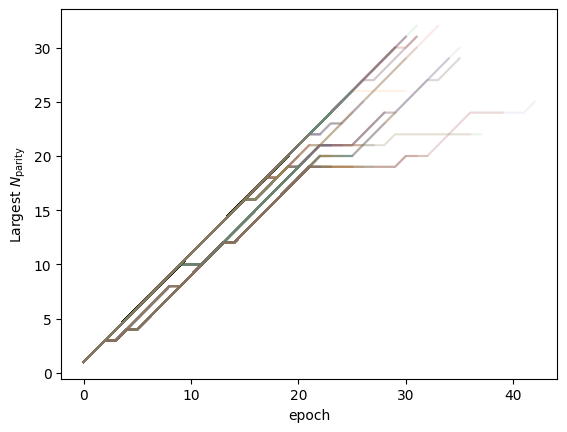

In [15]:
import matplotlib.pyplot as plt
for stat in stats:
    plt.plot(stat['len_accuracies'], alpha=0.1)

plt.xlabel('epoch')
plt.ylabel('Largest $N_{\\text{parity}}$')

Text(0, 0.5, 'Largest $N_{\\text{parity}}$')

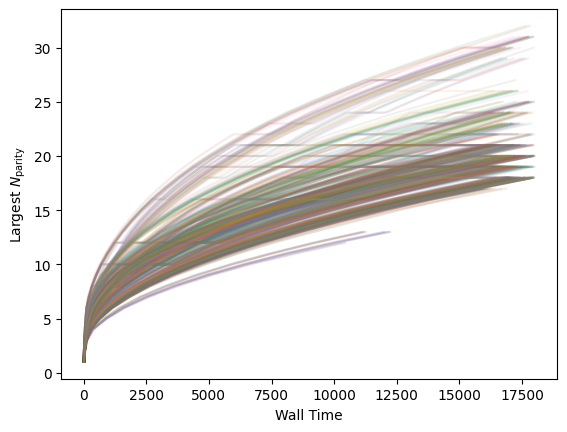

In [16]:
import matplotlib.pyplot as plt
for stat in stats:
    plt.plot(stat['time'], stat['len_accuracies'], alpha=0.1)

plt.xlabel('Wall Time')
plt.ylabel('Largest $N_{\\text{parity}}$')

In [17]:
# list(map(lambda x: x.tolist(), stat['accuracy']))

In [18]:
len(stats)

1024

In [19]:
configs_df.subdir

0        323_grow_parity_
1       1421_grow_parity_
2        800_grow_parity_
3       1801_grow_parity_
4       1734_grow_parity_
              ...        
1019     418_grow_parity_
1020    1806_grow_parity_
1021    1903_grow_parity_
1022    1262_grow_parity_
1023    1070_grow_parity_
Name: subdir, Length: 1024, dtype: object

In [20]:
configs_df[configs_df.subdir.str.startswith('994')].iloc[0]

SEED                                                                         0
NUM_EPOCHS                                                                 200
BATCH_SIZE                                                                 256
TRAINING_STEPS                                                             500
REPLICAS                                                                     2
TEST_STEPS                                                                  50
DEVICE                                                                     cpu
CURRICULUM                                                                grow
LEARNING_RATE                                                              0.4
MOMENTUM                                                                   0.1
FREEZING_STEPS                                                               1
GAMMA                                                                      0.1
SCHEDULE_INPUT_LAYERS                               

In [21]:
configs_df

,SEED,NUM_EPOCHS,BATCH_SIZE,TRAINING_STEPS,REPLICAS,TEST_STEPS,DEVICE,CURRICULUM,LEARNING_RATE,MOMENTUM,...,INPUT_SIZE,NET_SIZE,NUM_CLASSES,BIAS,NUM_READOUT_HEADS_PER_MOD,TRAIN_TAU,TASK,COMMIT_HASH,FILES_MODIFIED,subdir
0,0,200,256,500,2,50,cpu,grow,0.2,0.1,...,1,"[[10], [10], [10], [10], [10], [10], [10], [10...",2,True,1,True,parity,None,None,323_grow_parity_
1,0,200,256,500,2,50,cpu,grow,0.4,0.1,...,1,"[[5], [5], [5], [5], [5], [5], [5], [5], [5], ...",2,True,1,True,parity,None,None,1421_grow_parity_
2,0,200,256,500,2,50,cpu,grow,0.2,0.1,...,1,"[[5], [5], [5], [5], [5], [5], [5], [5], [5], ...",2,True,1,True,parity,None,None,800_grow_parity_
3,0,200,256,500,2,50,cpu,grow,0.2,0.1,...,1,"[[5], [5], [5], [5], [5], [5], [5], [5], [5], ...",2,True,1,True,parity,None,None,1801_grow_parity_
4,0,200,256,500,2,50,cpu,grow,0.4,0.1,...,1,"[[10], [10], [10], [10], [10], [10], [10], [10...",2,True,1,True,parity,None,None,1734_grow_parity_
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,0,200,256,500,2,50,cpu,grow,0.4,0.1,...,1,"[[5], [5], [5], [5], [5], [5], [5], [5], [5], ...",2,True,1,True,parity,None,None,418_grow_parity_
1020,0,200,256,500,2,50,cpu,grow,0.2,0.1,...,1,"[[5], [5], [5], [5], [5], [5], [5], [5], [5], ...",2,True,1,True,parity,None,None,1806_grow_parity_
1021,0,200,256,500,2,50,cpu,grow,0.2,0.1,...,1,"[[10], [10], [10], [10], [10], [10], [10], [10...",2,True,1,True,parity,None,None,1903_grow_parity_
1022,0,200,256,500,2,50,cpu,grow,0.4,0.1,...,1,"[[10], [10], [10], [10], [10], [10], [10], [10...",2,True,1,True,parity,None,None,1262_grow_parity_


In [22]:
for c in configs_df.columns:
    if c.startswith('DUPLICATE'):
        print(c, configs_df[c].unique())

DUPLICATE_INPUT_LAYERS [ True]
DUPLICATE_W_HH [ True]
DUPLICATE_W_FF_IN [ True]
DUPLICATE_FC [ True]
DUPLICATE_TAUS [False]


In [23]:
if 'BIAS_NIOSE' in configs_df.columns:
    configs_df['BIAS_NOISE'] = configs_df['BIAS_NIOSE']

In [24]:
multi_value_columns = []
for c in configs_df.columns:
    if isinstance(configs_df[c].iloc[0], list):
        configs_df[c] = configs_df[c].apply(lambda x: '_'.join(list(set([str(xi) for sublist in x for xi in sublist]))))
        
    if len(configs_df[c].unique()) > 1:
        print(c, configs_df[c].unique(), '\n')
        multi_value_columns.append(c)

LEARNING_RATE [0.2 0.4] 

GAMMA [0.1  0.95] 

WEIGHT_NOISE [0.3  0.05] 

BIAS_NOISE [0.3  0.05] 

TAUS_NOISE [0.3  0.05] 

NET_SIZE ['10' '5'] 

subdir ['323_grow_parity_' '1421_grow_parity_' '800_grow_parity_' ...
 '1903_grow_parity_' '1262_grow_parity_' '1070_grow_parity_'] 



In [25]:
df = pd.merge(configs_df, stats_df, on='subdir')

In [26]:
df['epoch_index'] = df.epochs.apply(lambda x: list(range(x + 1)))
df.sort_values(['LEARNING_RATE', 'MOMENTUM', 'GAMMA', 'WEIGHT_NOISE', 'NET_SIZE'], inplace=True)

In [27]:
df.epoch_index

29      [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
55      [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
108     [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
136     [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
142     [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
                              ...                        
968     [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
989     [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
997     [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
1000    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
1018    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
Name: epoch_index, Length: 1024, dtype: object

In [53]:
df['delta_time'] = df['time'].apply(lambda l: [0] + [l[i] - l[i-1] for i in range(1, len(l))])


In [56]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interactive, Dropdown, VBox, HBox
from matplotlib.lines import Line2D
import numpy as np

# # Create example DataFrame
# df = pd.DataFrame({
#     'ID': [1, 2, 3, 4, 5],
#     'Category': ['A', 'B', 'A', 'C', 'B'],
#     'Subcategory': ['X', 'Y', 'X', 'Z', 'Y'],
#     'Values': [np.random.rand(5).tolist() for _ in range(5)]
# })

# Function to create dropdown widgets for specified columns
def create_dropdowns(columns):
    dropdowns = {}
    for col in columns:
        dropdown = Dropdown(options=['All'] + sorted(df[col].unique()), description=col+':')
        dropdowns[col] = dropdown
    return dropdowns

# Function to plot data based on dropdown selections
def plot_data(**kwargs):
    x_col = kwargs.pop('x_col')
    y_col = kwargs.pop('y_col')
    color_by = kwargs.pop('Color Lines By')
    filtered_df = df.copy()
    filters = []
    for col, value in kwargs.items():
        if value != 'All':
            filtered_df = filtered_df[filtered_df[col] == value]
            filters.append(f'{col}={value}')
    
    print("Number of items left: ", len(filtered_df))
    if not filtered_df.empty:
        fig, ax = plt.subplots(figsize=(10, 6))
        plotted_with_labels = False
        if color_by == 'None':
            # Plot without differentiating colors
            for _, row in filtered_df.iterrows():
                ax.plot(row[x_col], row[y_col] , marker='o', linestyle='-')
        else:
            unique_values = sorted(filtered_df[color_by].unique())
            norm = plt.Normalize(0, len(unique_values)-1)
            scalar_map = plt.cm.ScalarMappable(norm=norm, cmap='viridis')
            colors = plt.cm.viridis(np.linspace(0, 1, len(unique_values)))
            plots = []
            for value, color in zip(unique_values, colors):
                for j, row in filtered_df.iterrows():
                    color_value = f'{value}' if j == 0 else '_nolegend_'
                    # print(value, color_value)
                    ax.plot(row[x_col], row[y_col], marker='o', linestyle='-', color=color, label=color_value, alpha=0.3)
                    # plots.append(p)
                    plotted_with_labels = True
        if plotted_with_labels:
            legend_elements = [Line2D([0], [0], color=scalar_map.to_rgba(i), lw=2, label=category) for i, category in enumerate(unique_values)]
            ax.legend(title=color_by, handles=legend_elements)
        ax.set_title(f'Filters: ' + ';'.join(filters))
        
        ax.set_xlabel(x_col)
        ax.set_ylabel(y_col)
        ax.grid(True)
        ax.set_yscale('log')
        
        x_max = max(df[x_col].apply(max))
        y_max = max(df[y_col].apply(max))
        plt.xlim([0, x_max])
        plt.ylim([1, y_max + 1])
        fig.show()
            # print(plots)

        
# Columns to use for selectors
selector_columns = multi_value_columns
color_by_columns = multi_value_columns

x_cols = ['epoch_index', 'time']
y_cols = ['len_accuracies', 'delta_time']

# Create dropdown widgets
dropdowns = {col: Dropdown(options=['All'] + sorted(df[col].unique()), description=col+':') for col in selector_columns}

color_by_dropdown = Dropdown(options=['None'] + color_by_columns, description='Color Lines By:')

x_cols = Dropdown(options=x_cols, description='x_col')
y_cols = Dropdown(options=y_cols, description='y_col')

all_widgets = {**dropdowns, **{'Color Lines By': color_by_dropdown}, **{'x_col': x_cols, 'y_col': y_cols}}
# Create interactive widget
interactive_plot = interactive(plot_data, **all_widgets)

# Display widgets and interactive plot
# display(VBox([HBox([v for v in dropdowns.values()]), color_by_dropdown]), interactive_plot)
display(interactive_plot)


interactive(children=(Dropdown(description='LEARNING_RATE:', options=('All', 0.2, 0.4), value='All'), Dropdown…

In [29]:
def plot_average_trend(column, epoch):
    df[f'len_accuracies_epoch={epoch}'] = df['len_accuracies'].apply(lambda x: x[epoch] if len(x) > epoch else 0)
    result = df.groupby(column)[f'len_accuracies_epoch={epoch}'].agg(('mean', 'std'))
    x = list(result.index)
    y = result['mean'].values
    yerr = result['std'].values

    plt.errorbar(x, y, yerr)
    plt.xlabel(f'{column}')
    plt.ylabel('average N reached')

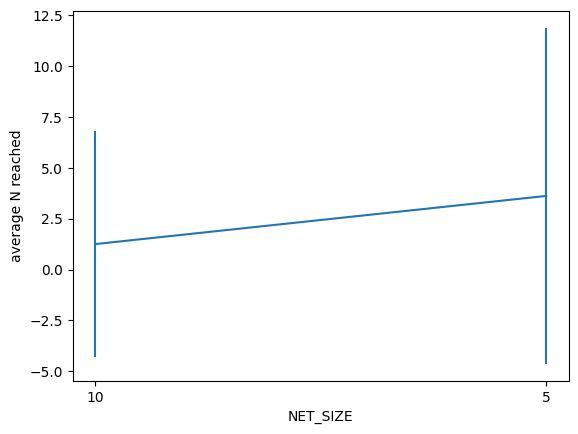

In [30]:
plot_average_trend('NET_SIZE', 25)

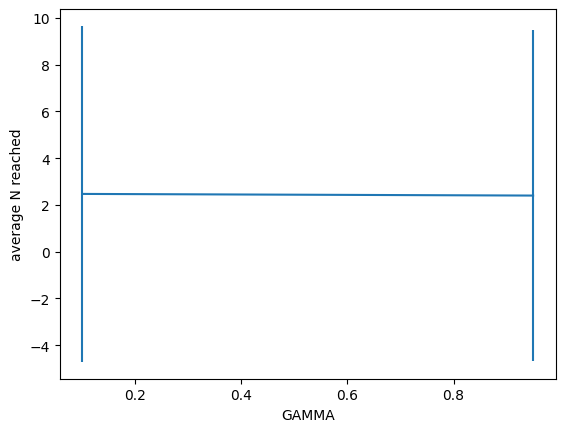

In [31]:
plot_average_trend(column='GAMMA', epoch=25)


In [32]:
# import re

# pattern = r'N(\d*)'
# match = re.search(pattern, 'alskdfj_1_iN234')
# match.group(1).isdigit()

# match = re.search(pattern, 'alskdfj_1_iNinit')
# match.group(1).isdigit()



# match = re.search(pattern, 'alskdf')
# match
# print(match)

In [33]:
import re

max_vals = {}
pattern = r'N(\d*)'
for k, l in paths.items():
    # print(l)
    g = [re.search(pattern, v) for v in l]
    max_val = max([int(gg.group(1)) for gg in g if gg is not None])
    max_vals[k] = max_val

(array([ 16.,   0.,  53., 476., 304.,  59.,  60.,  14.,   9.,  33.]),
 array([13., 15., 17., 19., 21., 23., 25., 27., 29., 31., 33.]),
 <BarContainer object of 10 artists>)

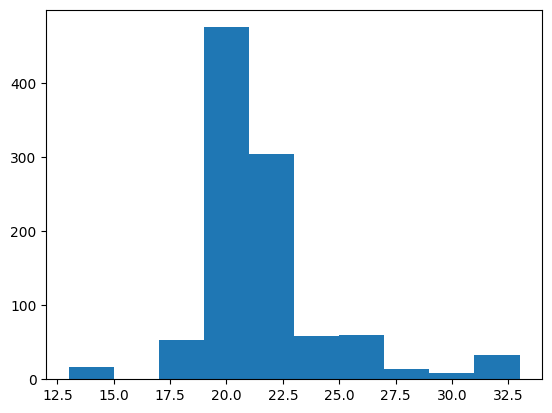

In [34]:
plt.hist(max_vals.values())

In [67]:
paths_sorted = sorted(max_vals.items(), key=lambda x: x[1], reverse=True)

In [68]:
paths_sorted[0]

('128_grow_parity_', 33)

In [69]:
reload(compute_taus_growing)
from src.models import RNN_hier
reload(RNN_hier)
full_path = './trained_models/SLURM_ARRAY_JOB_ID=7681088_Mar-11-2024-16_09_54/128_grow_parity_/rnn_1_N33'
rnn, configs = compute_taus_growing.load_and_hydrate_hierarchical_model(full_path)

In [59]:
rnn


RNN_Hierarchical(
  (afunc): LeakyReLU(negative_slope=0.01)
  (parameter_dict): ParameterDict(
      (0): Parameter containing: [torch.FloatTensor of size 5]
      (1): Parameter containing: [torch.FloatTensor of size 5]
      (10): Parameter containing: [torch.FloatTensor of size 5]
      (11): Parameter containing: [torch.FloatTensor of size 5]
      (12): Parameter containing: [torch.FloatTensor of size 5]
      (13): Parameter containing: [torch.FloatTensor of size 5]
      (14): Parameter containing: [torch.FloatTensor of size 5]
      (15): Parameter containing: [torch.FloatTensor of size 5]
      (16): Parameter containing: [torch.FloatTensor of size 5]
      (17): Parameter containing: [torch.FloatTensor of size 5]
      (18): Parameter containing: [torch.FloatTensor of size 5]
      (19): Parameter containing: [torch.FloatTensor of size 5]
      (2): Parameter containing: [torch.FloatTensor of size 5]
      (20): Parameter containing: [torch.FloatTensor of size 5]
      (21): 

In [60]:
import torch

In [61]:
taus_avg = [torch.mean(rnn.taus[k]).item() for k in rnn.taus.keys()]

Text(0, 0.5, '$<\\tau>$')

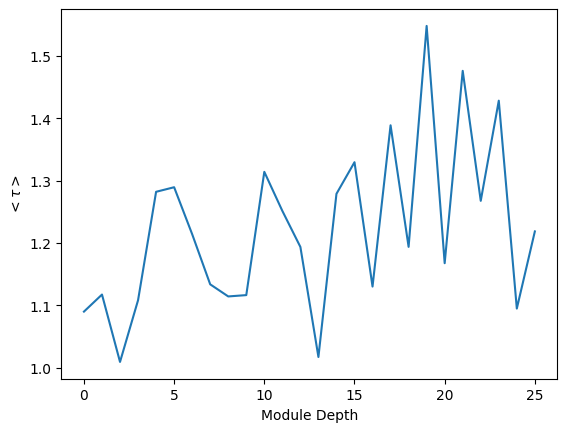

In [62]:
plt.plot(taus_avg[:26])
plt.xlabel('Module Depth')
plt.ylabel('$<\\tau>$')

In [72]:
reload(compute_taus_growing)
from analysis.timescales import timescales_utils
reload(timescales_utils)
full_path = './trained_models/SLURM_ARRAY_JOB_ID=7681088_Mar-11-2024-16_09_54/128_grow_parity_/rnn_1_N33'
for subdir, N_max_max in paths_sorted[:5]:

    print("Running on: ", subdir)
    full_path = os.path.join("trained_models", "SLURM_ARRAY_JOB_ID=7681088_Mar-11-2024-16_09_54",
                             subdir, f'rnn_1_N{N_max_max}')

    rnn, configs = compute_taus_growing.load_and_hydrate_hierarchical_model(full_path)

    # comp_acs arguments:
    load_kwargs = {'full_path': full_path} 
    save_path = './results/'
    curriculum_type = 'cumulative' # todo: double check
    task = 'parity'
    network_number = subdir.split('_')[0] # todo: double check
    N_max_max = 26
    N_max_range = np.arange(N_max_max, N_max_max+1, 1)
    burn_T = 500 # Burn-in time at the beginning of each simulation to reach stationary state
    T = 10**2 + 500 + burn_T # number of time steps for simulations
    
    num_neurons = int(configs['NET_SIZE'][0][0])
    num_trials = 12 # number of simulated trials
    max_lag = 200 # maximum time lag for saving ACs
    fit_lag = 30  # maximum time-lag for fitting ACs (we choose a small number to avoid AC bias)



    timescales_utils.comp_acs(load_function=compute_taus_growing.load_and_hydrate_hierarchical_model,                       
                              load_func_kwargs=load_kwargs, 
                              save_path=save_path, 
                              curriculum_type=curriculum_type,
                              task=task, 
                              network_number=network_number,
                              N_max_range=N_max_range, 
                              T=T, 
                              num_neurons=num_neurons, 
                              num_trials=num_trials, 
                              max_lag=max_lag, 
                              fit_lag=fit_lag, 
                              burn_T=burn_T)

Running on:  128_grow_parity_
N =  26
Computing population AC
Computing single-neuron AC


100%|██████████| 125/125 [00:02<00:00, 47.61it/s]


------------
Running on:  1408_grow_parity_
N =  26
Computing population AC
Computing single-neuron AC


100%|██████████| 125/125 [00:02<00:00, 51.82it/s]


------------
Running on:  750_grow_parity_
N =  26
Computing population AC
Computing single-neuron AC


100%|██████████| 250/250 [00:04<00:00, 50.17it/s]


------------
Running on:  288_grow_parity_
N =  26
Computing population AC
Computing single-neuron AC


100%|██████████| 125/125 [00:02<00:00, 49.06it/s]


------------
Running on:  768_grow_parity_
N =  26
Computing population AC
Computing single-neuron AC


100%|██████████| 125/125 [00:02<00:00, 47.92it/s]

------------


In [ ]:
results_files

In [73]:
import glob
import pickle
results_files = glob.glob("./results/cumulative*")
data = {}
for path in results_files:
    with open(path, 'rb') as f:
        d = pickle.load(f)
    data[path] = d

In [74]:
data.keys()

dict_keys(['./results/cumulative_parity_network_115_N26_acs_taus.pkl', './results/cumulative_parity_network_497_N26_acs_taus.pkl', './results/cumulative_parity_network_750_N26_acs_taus.pkl', './results/cumulative_parity_network_1408_N26_acs_taus.pkl', './results/cumulative_parity_network_768_N26_acs_taus.pkl', './results/cumulative_parity_network_481_N26_acs_taus.pkl', './results/cumulative_parity_network_288_N26_acs_taus.pkl', './results/cumulative_parity_network_128_N26_acs_taus.pkl', './results/cumulative_parity_network_418_N26_acs_taus.pkl', './results/cumulative_parity_network_754_N26_acs_taus.pkl'])

In [ ]:
N_max_range

In [ ]:
data['./results/cumulative_parity_network_115_N26_acs_taus.pkl']['taus_trained']

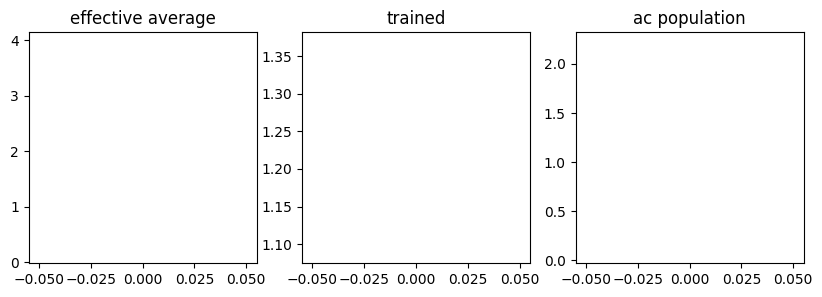

In [75]:
fig, ax = plt.subplots(1,3, figsize=(10, 3))

for p in data.keys():

    tau_eff_avg = np.mean(data[p]['taus_net'])
    tau_trained = np.mean(data[p]['taus_trained'][0])
    ac_pop = [np.mean(data[p]['ac_pop']) for n in N_max_range]


    ax[0].plot(tau_eff_avg)
    ax[0].set_title('effective average')
    ax[1].plot(tau_trained)
    ax[1].set_title('trained')
    ax[2].plot(ac_pop)
    ax[2].set_title('ac population')

In [ ]:
data.keys()

In [ ]:
tau_eff_avg = [np.mean(data[n][0][:]) for n in N_max_range]
tau_trained = [np.mean(data[n][2][:]) for n in N_max_range]
ac_pop = [np.mean(data[n][-1]) for n in N_max_range]


In [ ]:
fig, ax = plt.subplots(figsize=(2,2))
ax.plot(data[6][0])


In [ ]:
fig, ax = plt.subplots(1,3, figsize=(10, 3))
ax[0].plot(tau_eff_avg)
ax[0].set_title('effective average')
ax[1].plot(tau_trained)
ax[1].set_title('trained')
ax[2].plot(ac_pop)
ax[2].set_title('ac population')

In [ ]:
tau_trained = [np.average(data[n][2][n-2]) for n in N_max_range]

# plt.violinplot(tau_trained)

In [ ]:
tau_trained

In [ ]:
plt.plot(tau_trained)

In [ ]:
len(tau_trained)

In [ ]:
len(tau_trained[0])

In [ ]:
tau_trained[5]

In [ ]:
plt.violinplot(tau_trained[24]);

In [ ]:
rnn.net_size